In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns",None)

### Train Data

#### we use different for train and test because of "DATA LEKAGE PROBLEM" can be sloved by seperated the train and test

In [3]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### their is a small null value it is in the same row so i can drop it no issues

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.sample(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3219,SpiceJet,21/05/2019,Delhi,Cochin,DEL → MAA → COK,15:45,22:05,6h 20m,1 stop,No info,7317
7667,Air India,21/03/2019,Delhi,Cochin,DEL → COK,14:10,17:10,3h,non-stop,No info,5674
4626,IndiGo,6/03/2019,Delhi,Cochin,DEL → COK,05:35,08:50,3h 15m,non-stop,No info,7673


### EDA

### **.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [11]:
df["Date"] = pd.to_datetime(df["Date_of_Journey"]).dt.day
df["Month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


  After we got date and month we no need this feature so we can drop it

In [13]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [14]:
df.sample(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
5572,Jet Airways,Banglore,Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,In-flight meal not included,7229,6,9
4728,SpiceJet,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info,4174,24,5
1371,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,8073,18,5


In [15]:
df["Dep_hours"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [16]:
df.drop("Dep_Time",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hours,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [17]:
df["Hours"] = pd.to_datetime(df["Arrival_Time"],errors = 'coerce').dt.hour
df["Minutes"] =  pd.to_datetime(df["Arrival_Time"],errors = 'coerce').dt.minute

In [18]:
df.sample(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes
3437,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,09:45 13 May,16h 45m,1 stop,No info,14151,5,12,17,0,9,45
1070,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,09:45 07 May,13h 20m,1 stop,In-flight meal not included,8066,5,6,20,25,9,45
8685,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:00,7h 35m,1 stop,No info,9103,21,5,11,25,19,0


In [19]:
df.drop("Arrival_Time",axis=1,inplace=True)
df.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes
4010,Jet Airways,Delhi,Cochin,DEL → BOM → COK,16h 55m,1 stop,No info,19828,3,3,11,30,4,25
1839,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,5h 35m,1 stop,No info,4150,24,3,4,15,9,50
7451,Air India,Delhi,Cochin,DEL → HYD → MAA → COK,16h 10m,2 stops,No info,8839,5,1,17,15,9,25
5886,SpiceJet,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,No check-in baggage included,2175,15,5,13,15,14,45
3277,Jet Airways,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,In-flight meal not included,4050,3,9,19,40,21,10


In [20]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [21]:
df.sample(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes
7274,Air India,Kolkata,Banglore,9h 15m,1 stop,11936,15,5,7,0,16,15
2711,Air India,Kolkata,Banglore,19h 25m,2 stops,14109,18,5,10,0,5,25
6388,SpiceJet,Kolkata,Banglore,2h 35m,non-stop,3873,21,5,6,55,9,30


In [22]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])
'''
"2h 35m".split()
"2h 35m".strip()
'''
for i in range(len(duration)):
    if len(duration[i].split()) != 2:            # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]                  # Adds 0 hour
duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))  #"2h 3m".split(sep="h")[0]
    duration_minute.append(int(duration[i].split(sep="m")[0].split()[-1]))        #int("2h 3m".split(sep="m")[0][-1])

In [23]:
df["Duration_hours"] = duration_hours
df["Duration_minute"] = duration_minute

In [24]:
df.sample(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes,Duration_hours,Duration_minute
6340,SpiceJet,Mumbai,Hyderabad,1h 25m,non-stop,3603,3,9,22,45,0,10,1,25
7903,Air India,Kolkata,Banglore,22h 30m,1 stop,8366,6,9,9,25,7,55,22,30
5209,Multiple carriers,Delhi,Cochin,12h 10m,1 stop,14533,18,5,7,5,19,15,12,10
4327,Jet Airways,Delhi,Cochin,9h,1 stop,12373,5,9,10,0,19,0,9,0
8267,Jet Airways,Delhi,Cochin,18h 15m,2 stops,14300,15,6,18,20,12,35,18,15


In [25]:
df.drop("Duration",axis=1,inplace=True)

In [26]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Price            10682 non-null  int64 
 5   Date             10682 non-null  int64 
 6   Month            10682 non-null  int64 
 7   Dep_hours        10682 non-null  int64 
 8   Dep_minute       10682 non-null  int64 
 9   Hours            10682 non-null  int64 
 10  Minutes          10682 non-null  int64 
 11  Duration_hours   10682 non-null  int64 
 12  Duration_minute  10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Handling Categorical Data
### One can find many ways to handle categorical data. Some of them categorical data are,

   **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case 
   
    'we can't say this is better then this so we will give it as one-hot encoding'
   
   **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case
   
         ' in this can say this is better than this'

In [28]:
df_categorical = [feature for feature in df.columns if df[feature].dtype == "O"]
df[df_categorical].sample(5)

,Airline,Source,Destination,Total_Stops
5541,Multiple carriers,Delhi,Cochin,1 stop
4394,Jet Airways,Delhi,Cochin,1 stop
8845,Jet Airways,Delhi,Cochin,1 stop
2664,Multiple carriers,Delhi,Cochin,1 stop
7854,IndiGo,Kolkata,Banglore,non-stop


#### Airline

In [29]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [30]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Dep_hours', 'Dep_minute', 'Hours', 'Minutes',
       'Duration_hours', 'Duration_minute'],
      dtype='object')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

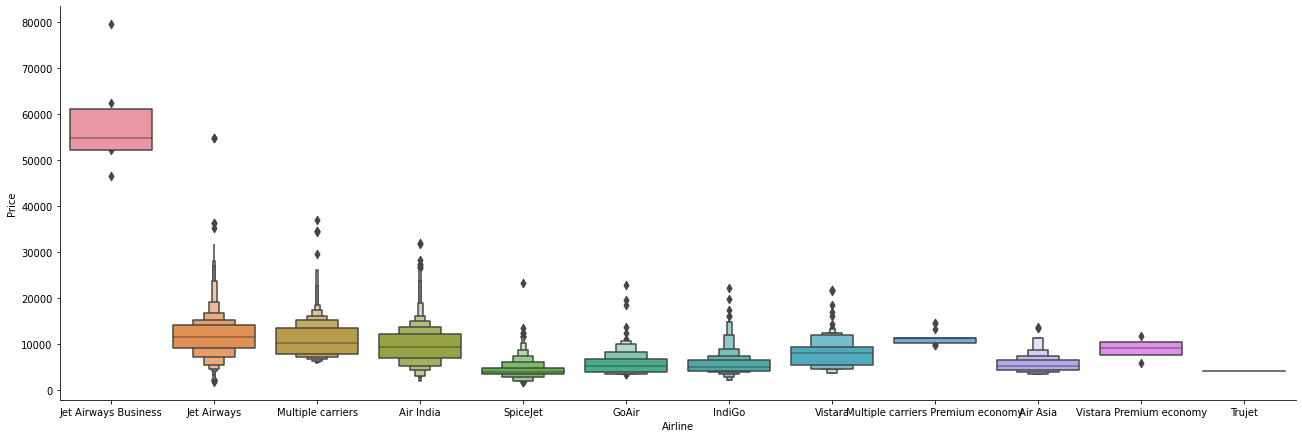

In [32]:
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",height = 6, aspect = 3)
#plt.figure(figsize=(10,10))
plt.show()

In [33]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

airlines = df[["Airline"]]
airlines = pd.get_dummies(airlines,drop_first=True)
airlines.sample(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
2080,1,0,0,0,0,0,0,0,0,0,0
810,0,0,0,1,0,0,0,0,0,0,0


In [34]:
df_categorical

['Airline', 'Source', 'Destination', 'Total_Stops']

#### Source

In [35]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

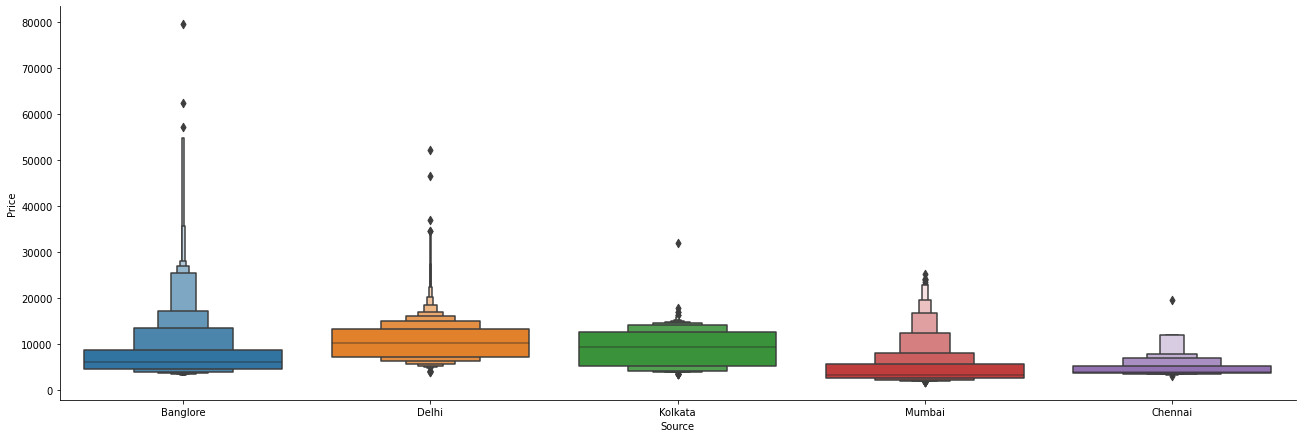

In [36]:
sns.catplot(y="Price",x="Source",data=df.sort_values("Price",ascending=False),kind="boxen",height = 6, aspect = 3)
#plt.figure(figsize=(10,10))
plt.show()

In [37]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

source = df[["Source"]]
source = pd.get_dummies(source,drop_first=True)
source.sample(3)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
2442,0,0,1,0
1658,0,1,0,0
9630,0,1,0,0


#### Destination

In [38]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [39]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.sample(3)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
9713,0,0,0,0,1
9955,1,0,0,0,0
1416,0,0,1,0,0


#### Total_Stops

In [40]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
## let me map 
# label(ordinal) encoding data this is so we will do like this like this is ranking
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
total_steps = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

In [42]:
df["Total_Stops"] = df["Total_Stops"].map(total_steps)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [43]:
data = pd.concat([df,Destination,source,airlines],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes,Duration_hours,Duration_minute,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data.head()

,Total_Stops,Price,Date,Month,Dep_hours,Dep_minute,Hours,Minutes,Duration_hours,Duration_minute,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [45]:
data.shape

(10682, 30)

<AxesSubplot:>

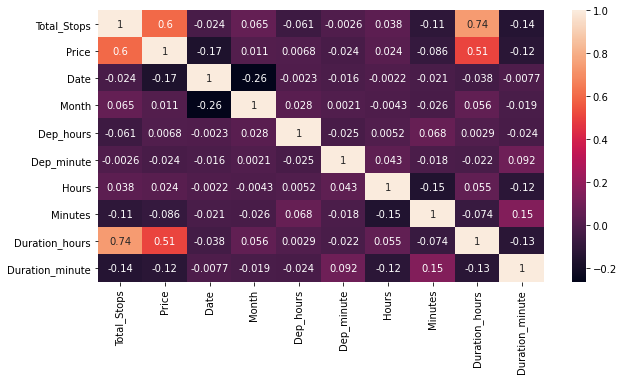

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

#### ALL THE ABOVE CODE IS FOR TRAIN DATA

### Test Data

In [47]:
df = pd.read_excel("Test_set.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
df.shape

(2671, 10)

In [49]:
#Date_of_journey

df["Date"] = pd.to_datetime(df["Date_of_Journey"]).dt.day
df["Month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month

df.drop("Date_of_Journey",axis=1,inplace=True)
df.sample(3)
print("-"*75)

# Arrival_time

df["Hours"] = pd.to_datetime(df["Arrival_Time"],errors = 'coerce').dt.hour
df["Minutes"] =  pd.to_datetime(df["Arrival_Time"],errors = 'coerce').dt.minute

df.drop("Arrival_Time",axis=1,inplace=True)
df.sample(3)
print("-"*75)

df["Dep_hours"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df.drop("Dep_Time",axis=1,inplace=True)
df.sample(3)
print("-"*75)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route","Additional_Info"],axis=1,inplace=True)

df.sample(5)

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])
'''
"2h 35m".split()
"2h 35m".strip()
'''
for i in range(len(duration)):
    if len(duration[i].split()) != 2:            # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]                  # Adds 0 hour
duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))  #"2h 3m".split(sep="h")[0]
    duration_minute.append(int(duration[i].split(sep="m")[0].split()[-1]))        #int("2h 3m".split(sep="m")[0][-1])

df["Duration_hours"] = duration_hours
df["Duration_minute"] = duration_minute

df.drop("Duration",axis=1,inplace=True)

###CATEGORICAL

# As Airline is Nominal Categorical data we will perform OneHotEncoding

airlines = df[["Airline"]]
airlines = pd.get_dummies(airlines,drop_first=True)
airlines.sample(2)


# As Source is Nominal Categorical data we will perform OneHotEncoding

source = df[["Source"]]
source = pd.get_dummies(source,drop_first=True)
source.sample(3)


# As Source is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.sample(3)


## let me map 
# label(ordinal) encoding data this is so we will do like this like this is ranking
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
total_steps = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

df["Total_Stops"] = df["Total_Stops"].map(total_steps)
df.head()

data_test = pd.concat([df,Destination,source,airlines],axis=1)
data_test.head()

data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_test.head()

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------


,Total_Stops,Date,Month,Hours,Minutes,Dep_hours,Dep_minute,Duration_hours,Duration_minute,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,6,6,4,25,17,30,10,55,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,5,12,10,20,6,20,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,21,5,21,0,8,0,13,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
data_test.shape

(2671, 28)


### **Feature Selection**
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**

In [51]:
data.shape

(10682, 30)

In [52]:
data.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Dep_hours', 'Dep_minute',
       'Hours', 'Minutes', 'Duration_hours', 'Duration_minute',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [53]:
x = data.drop("Price",axis=1)
y =  data["Price"]

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

In [55]:
print(etr.feature_importances_)

[2.26290838e-01 1.08875467e-01 8.41770816e-02 2.49048902e-02
 2.23157805e-02 2.84436503e-02 2.14222215e-02 1.33808201e-01
 1.79713944e-02 9.64667012e-03 1.18250276e-02 6.15596025e-03
 6.10009847e-04 2.31969894e-02 6.10805231e-04 7.38004534e-03
 4.11198670e-03 5.52937523e-03 1.07021954e-02 1.91424947e-03
 1.71167438e-02 1.37389470e-01 6.75886766e-02 1.86532063e-02
 9.30890499e-04 2.89407706e-03 8.51933447e-05 5.30818891e-03
 1.40714125e-04]


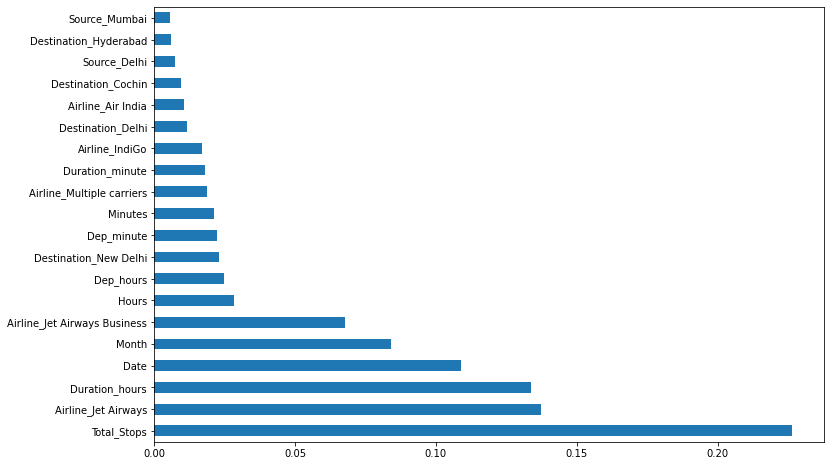

In [61]:
plt.figure(figsize=(12,8))
fearure_imp = pd.Series(etr.feature_importances_,index = x.columns)
fearure_imp.nlargest(20).plot(kind="barh")
plt.show()

#### Fitting model using Random Forest
   1. Split dataset into train and test set in order to prediction w.r.t X_test
   2. If needed do scaling of data
   3. Scaling is not done in Random forest
   4. Import model
   5. Fit the data
   6. Predict w.r.t X_test
   7. In regression check RSME Score
   8. Plot graph

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
y_pred = rfr.predict(x_test)
y_pred[:5]

array([12366.976,  6211.9  ,  3565.575, 13271.875,  5011.9  ])

In [65]:
y_test[:5]

10507    14781
7705      5636
7700      3597
1437     16757
8884      4804
Name: Price, dtype: int64

In [68]:
rfr.score(x_train,y_train)

0.956745998395498

In [69]:
rfr.score(x_test,y_test)

0.8016193026159012

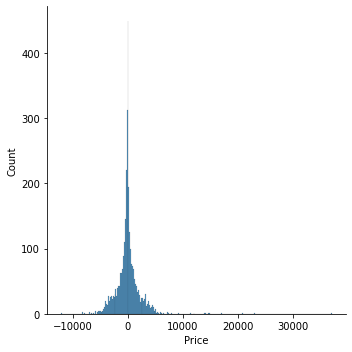

In [73]:
sns.displot(y_test-y_pred)
plt.show()

In [76]:
import warnings
warnings.filterwarnings("ignore")

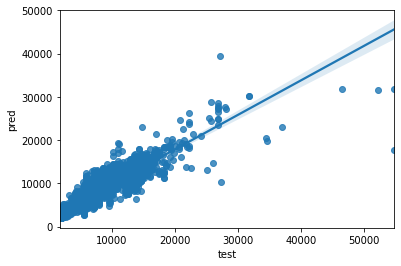

In [77]:
sns.regplot(y_test,y_pred)
plt.xlabel("test")
plt.ylabel("pred")
plt.show()

### Metrics

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8016193026159012

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE----{mean_absolute_error(y_test,y_pred)}")
print(f"MSE----{mean_squared_error(y_test,y_pred)}")
print(f"RMAE----{np.sqrt(mean_squared_error(y_test,y_pred))}")

MAE----1215.940946602349
MSE----4283032.508123435
RMAE----2069.548865845751


##  Hyper parameter tuning


1) Hyperparameter Tuning
2) Choose following method for hyperparameter tuning

3) RandomizedSearchCV --> Fast
4) GridSearchCV
3) Assign hyperparameters in form of dictionery
4) Fit the model
5) Check best paramters and best score

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#Randomized Search CV

# Number of trees in random forest

n_estimations = [int(x) for x in np.linspace(100,1200, num=12)]
# Number of features to consider at every split
max_features = ["auto","sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=12)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,20,22,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,10]

In [82]:
# Create the random grid

random_grid = {'n_estimators': n_estimations,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
rf_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid,scoring="neg_mean_squared_error",
                               n_iter=10,cv=5,verbose=2,random_state=0,n_jobs=1)

In [85]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  31.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  27.3s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  25.3s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  22.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  22.2s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=  34.1s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=  42.4s
[CV] END max_depth=23, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              22, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [90]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, min_samples_split=15, n_estimators=1200)

In [91]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 23}

In [92]:
prediction = rf_random.predict(x_test)

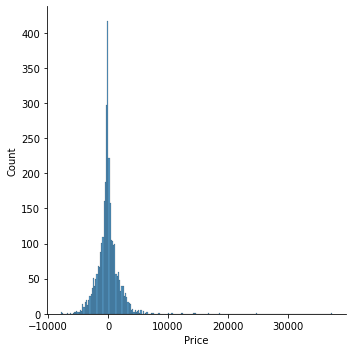

In [93]:
sns.displot(y_test-prediction)

<AxesSubplot:xlabel='Price'>

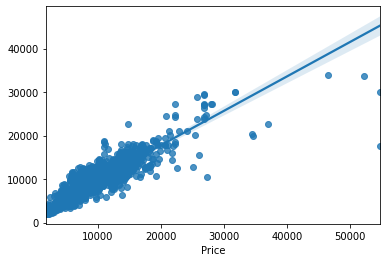

In [94]:
sns.regplot(y_test,prediction)

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE----{mean_absolute_error(y_test,prediction)}")
print(f"MSE----{mean_squared_error(y_test,prediction)}")
print(f"RMAE----{np.sqrt(mean_squared_error(y_test,prediction))}")

MAE----1192.2963858700678
MSE----3845155.326765165
RMAE----1960.906761364539


## Save the model to reuse it again

In [101]:
import pickle
file = open("filight_price.pkl","wb")
pickle.dump(rf_random,file)

In [102]:
model = open("filight_price.pkl","rb")
forest = pickle.load(model)

In [103]:
y_prediction = forest.predict(x_test)

In [104]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.8219008158758827

## Now you have to create an app

In [ ]:
## app.py to create a flask api